# Diagnóstico de Cancer de Mama (Winconsin, UCI)

#### Importanto as bibliotecas necessárias

In [90]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, precision_score, recall_score, f1_score, roc_curve, plot_confusion_matrix, precision_recall_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#### Abrindo o dataset para leitura

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\Desktop\Matérias 2 semestre\cdados\Breast_Cancer_Wisconsin-1


In [3]:
filename = 'data.csv'

In [4]:
data = pd.read_csv(filename)
data.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [5]:
data.shape

(569, 33)

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Realizando limpeza da base de dados

In [7]:
data = data.drop(['Unnamed: 32'],axis=1)

In [8]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Seleção de features

In [10]:
X = pd.DataFrame(data.iloc[:, 2:])
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Seleção de target

In [11]:
y = pd.DataFrame(data.iloc[:, 1])
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


### Selecionando as features mais relevantes

In [12]:
fit_feat = SelectKBest(score_func=f_classif)

In [13]:
fit_feat.fit(X, y)

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SelectKBest()

In [14]:
score_col = pd.DataFrame(fit_feat.scores_, columns=['Score Values'])

In [15]:
name_columns = pd.DataFrame(X.columns, columns=['Features'])

In [16]:
feat = pd.concat([name_columns, score_col], axis=1)
feat

,Features,Score Values
0,radius_mean,646.981021
1,texture_mean,118.096059
2,perimeter_mean,697.235272
3,area_mean,573.060747
4,smoothness_mean,83.651123
5,compactness_mean,313.233079
6,concavity_mean,533.793126
7,concave points_mean,861.676020
8,symmetry_mean,69.527444
9,fractal_dimension_mean,0.093459


### Como escolher as melhores features?

In [17]:
feat.sort_values(by='Score Values')

,Features,Score Values
18,symmetry_se,0.024117
11,texture_se,0.039095
9,fractal_dimension_mean,0.093459
14,smoothness_se,2.557968
19,fractal_dimension_se,3.468275
16,concavity_se,39.014482
15,compactness_se,53.247339
29,fractal_dimension_worst,66.443961
8,symmetry_mean,69.527444
4,smoothness_mean,83.651123


Aqui encontramos as 4 primeiras menos relevantes features. Dessa forma, é possível realizar uma redução de dimensionalidade retirando as seguintes features:
- symmetry_se
- texture_se
- fractal_dimension_mean
- smoothness_se
- fractal_dimension_se	

In [18]:
X = X.drop(['symmetry_se', 'texture_se', 'fractal_dimension_mean', 'smoothness_se', 'fractal_dimension_se'], axis=1)

In [19]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
label = LabelEncoder()

In [21]:
label

LabelEncoder()

In [22]:
y = label.fit_transform(y)

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Contagem de benignos e malignos

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

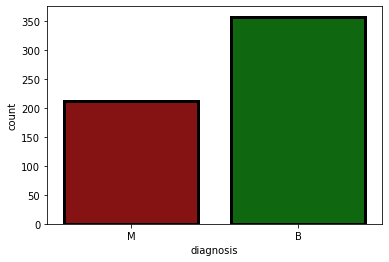

In [23]:
sb.countplot(data = data, x="diagnosis", palette=["#990000","#007700"], edgecolor="black", lw=3)

### Analisando o Raio médio do tecido (Histograma)

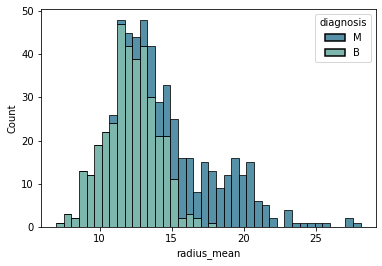

In [24]:
sb.histplot(data,x="radius_mean", hue="diagnosis",multiple="stack",palette="crest_r",edgecolor="black",lw=1.5,bins=40,log_scale=False);

#### Criando um scater plot

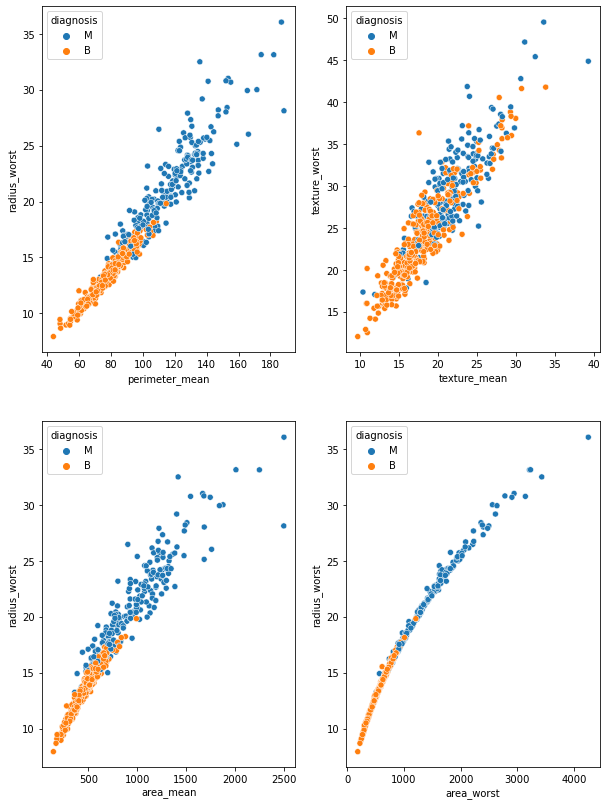

In [25]:
fig,ax=plt.subplots(2, 2, figsize=(10,14))
sb.scatterplot(x='perimeter_mean',y='radius_worst',data=data,hue='diagnosis',ax=ax[0][0])
sb.scatterplot(x='area_mean',y='radius_worst',data=data,hue='diagnosis',ax=ax[1][0])
sb.scatterplot(x='texture_mean',y='texture_worst',data=data,hue='diagnosis',ax=ax[0][1])
sb.scatterplot(x='area_worst',y='radius_worst',data=data,hue='diagnosis',ax=ax[1][1])
plt.show()

### Criando um Mapa de Calor de todas as features

<AxesSubplot:>

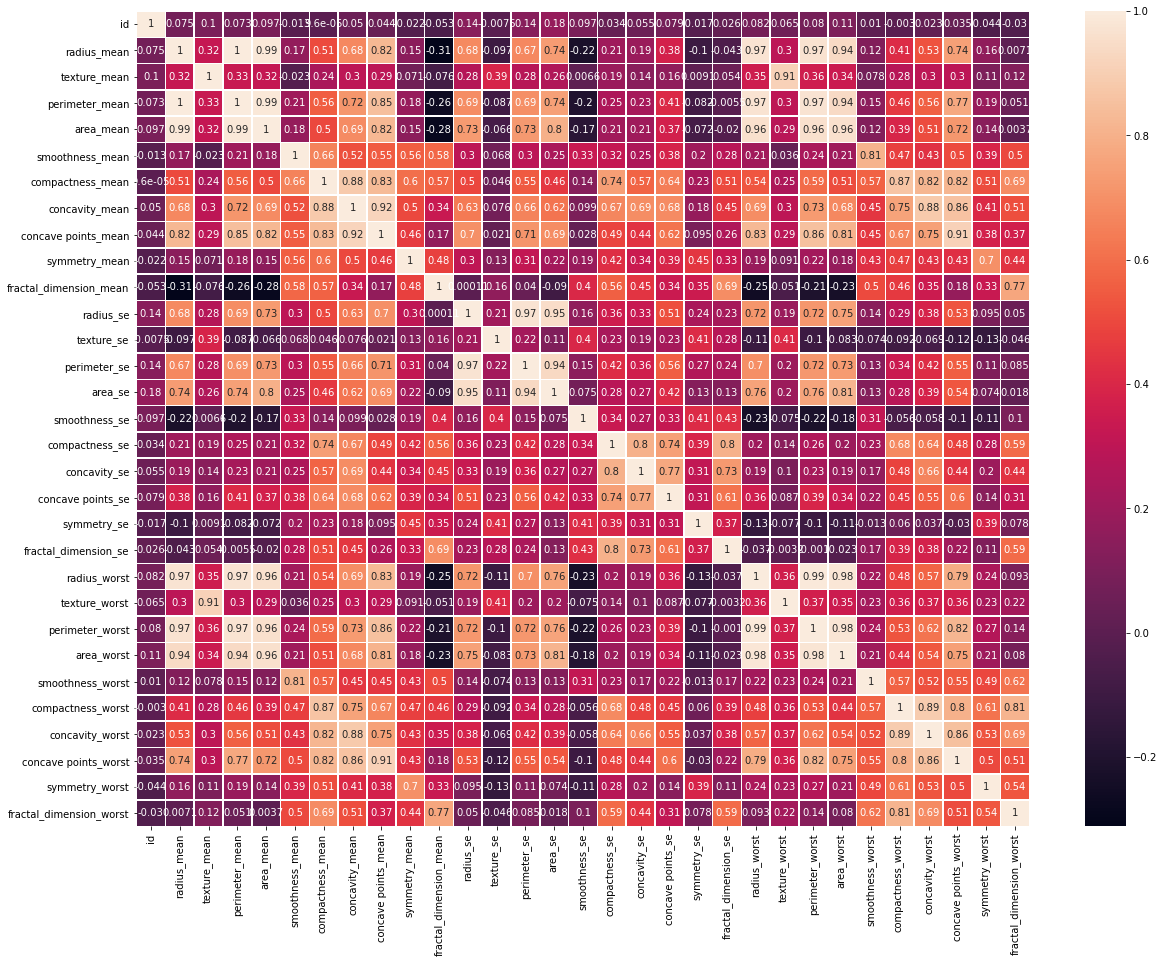

In [26]:
fig, ax = plt.subplots(figsize=(20,15)) 
sb.heatmap(data.corr(),ax=ax,annot=True,linewidth=.5)

### Criando conjunto de treino e de teste (train, test, split)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.86, random_state=111)

In [28]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
413,14.99,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,0.3186,...,16.76,31.55,110.20,867.1,0.1077,0.33450,0.311400,0.13080,0.3163,0.09251
433,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.159400,0.087440,0.1943,0.8191,...,22.66,30.93,145.30,1603.0,0.1390,0.34630,0.391200,0.17080,0.3007,0.08314
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.2144,...,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418
528,13.94,13.17,90.31,594.2,0.12480,0.09755,0.101000,0.066150,0.1976,0.5461,...,14.62,15.38,94.52,653.3,0.1394,0.13640,0.155900,0.10150,0.2160,0.07253
331,12.98,19.35,84.52,514.0,0.09579,0.11250,0.071070,0.029500,0.1761,0.2684,...,14.42,21.95,99.21,634.3,0.1288,0.32530,0.343900,0.09858,0.3596,0.09166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.5835,...,17.06,28.14,110.60,897.0,0.1654,0.36820,0.267800,0.15560,0.3196,0.11510
118,15.78,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.5520,...,20.19,30.50,130.30,1272.0,0.1855,0.49250,0.735600,0.20340,0.3274,0.12520
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,0.1543,0.2212,...,14.04,21.08,92.80,599.5,0.1547,0.22310,0.179100,0.11550,0.2382,0.08553
275,11.89,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.074040,0.2015,0.6412,...,12.40,18.99,79.46,472.4,0.1359,0.08368,0.071530,0.08946,0.2220,0.06033


## Random Forest (Floresta aleatória)

In [29]:
rf_clf = RandomForestClassifier(n_estimators=200)

In [30]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
y_pred_rf = rf_clf.predict(X_test)

In [32]:
accuracy_score(y_pred_rf, y_test)

0.975

#### Método K-fold de validação cruzada

In [104]:
cross_val_score(rf_clf, X_test, y_test, cv=3, scoring='accuracy')

array([0.88888889, 1.        , 0.84615385])

#### Matriz de confusão para o Random Forest

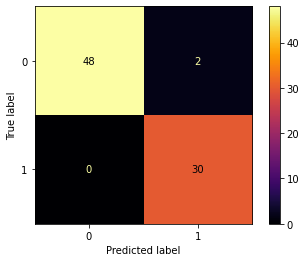

In [105]:
plot_confusion_matrix(rf_clf, X_test, y_test, cmap='inferno')
plt.show()

#### Precision (Precisão)

PRECISION = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_POSITIVE)

In [35]:
precision_score(y_test, y_pred_rf)

0.9375

#### Recall (Revocação)

RECALL = TRUE_POSITIVE / (TRUE_POSITIVE + FALSE_NEGATIVE)

In [36]:
recall_score(y_test, y_pred_rf)

1.0

#### F1 Score (Média harmônica da precisão com a revocação)

F1 = TP / (TP + ((FN + FP)/2))

In [37]:
f1_score(y_test, y_pred_rf)

0.967741935483871

### ROC Curve (Curva de Característica de Operação)

In [38]:
y_probas_forest = cross_val_predict(rf_clf, X_test, y_test, cv=3, method='predict_proba')

In [39]:
y_scores_forest = y_probas_forest[:, 1]

In [40]:
# fpr - false positive rate
# tpr - true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_scores_forest)

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.ylabel('True Positive Rate (Recall)')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)

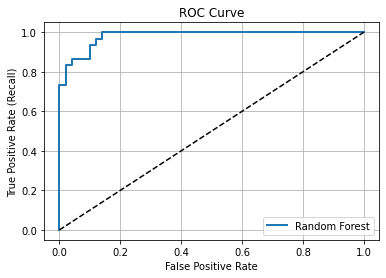

In [42]:
plot_roc_curve(fpr, tpr, 'Random Forest')
plt.legend()
plt.show()

## Gradiente descendente estocástico

In [43]:
sgd_clf = SGDClassifier(random_state=45)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=45)

In [44]:
y_pred_sgd = sgd_clf.predict(X_test)

In [45]:
accuracy_score(y_pred_sgd, y_test)

0.925

#### Método K-fold de validação cruzada

In [101]:
cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring='accuracy')

array([0.77777778, 0.92592593, 0.92307692])

#### Matriz de confusão para o Gradiente descendente estocástico

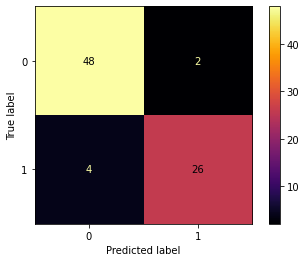

In [54]:
plot_confusion_matrix(sgd_clf, X_test, y_test, cmap='inferno')
plt.show()

#### Precision (Precisão)

In [63]:
precision_score(y_test, y_pred_sgd)

0.9285714285714286

#### Recall (Revocação)

In [65]:
recall_score(y_test, y_pred_sgd)

0.8666666666666667

#### F1 Score (Média harmônica da precisão com a revocação)

In [66]:
f1_score(y_test, y_pred_rf)

0.967741935483871

### Trade-off precisão/revocação

In [67]:
y_scores_sgd = cross_val_predict(sgd_clf, X_test, y_test, cv=3, method='decision_function')

In [69]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_sgd)

In [72]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precisions')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recalls')
    plt.title("Precisão (Precision) e Revocação (Recall) vs. Limiar de decisão (Threshold)")

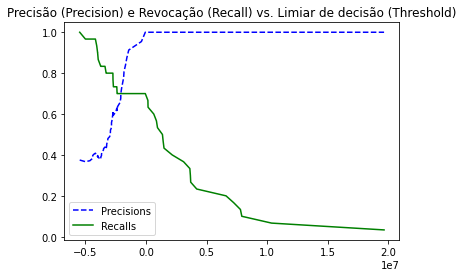

In [73]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.legend()
plt.show()

### ROC Curve

In [78]:
# fpr - false positive rate
# tpr - true positive rate
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_scores_sgd)

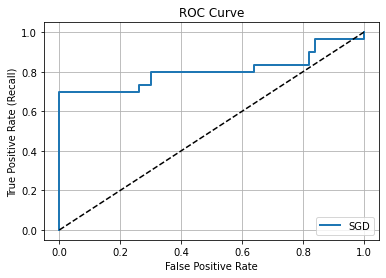

In [84]:
plot_roc_curve(fpr_sgd, tpr_sgd, 'SGD')
plt.legend(loc='lower right')
plt.show()

## Árvores de decisão

In [163]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [164]:
y_pred_dtree = tree_clf.predict(X_test)

In [165]:
accuracy_score(y_pred_dtree, y_test)

0.95

#### Método K-fold de validação cruzada

In [166]:
cross_val_score(tree_clf, X_test, y_test, cv=3, scoring='accuracy')

array([0.85185185, 0.92592593, 0.84615385])

#### Matriz de confusão para o classificador Árvores de decisão

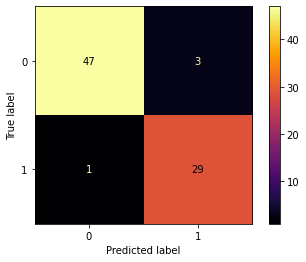

In [167]:
plot_confusion_matrix(tree_clf, X_test, y_test, cmap='inferno')
plt.show()

#### Precision (Precisão)

In [168]:
precision_score(y_test, y_pred_dtree)

0.90625

#### Revocação (Recall)

In [169]:
recall_score(y_test, y_pred_dtree)

0.9666666666666667

#### F1 score

In [170]:
f1_score(y_test, y_pred_dtree)

0.9354838709677419

In [171]:
y_scores_tree = cross_val_predict(tree_clf, X_test, y_test, cv=3, method='predict_proba')

In [172]:
y_scores_tree = y_scores_tree[:, 1]

In [173]:
fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_scores_tree)

In [174]:
y_scores_tree

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.])

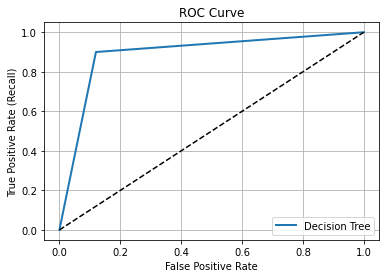

In [175]:
plot_roc_curve(fpr_tree, tpr_tree, 'Decision Tree')
plt.legend(loc='lower right')
plt.show()